Goals: 
- Isolate Eastern Bluebird


We choose the Eastern Bluebird (Sialia sialis) due to the abundance of data as well as the ease of analysis, as they are mostly contained within the eastern states of USA. 

From SpeciesList.csv, we find that the AOU code for Eastern Bluebird is 7660.

In [1]:
import pandas as pd

df = pd.read_csv("mourningdove.csv")
df

Country  State  Route    Year     Aou  SpeciesTotal
0        124.0    4.0    1.0  1990.0  3160.0           7.0
1        124.0    4.0    1.0  1991.0  3160.0          32.0
2        124.0    4.0    1.0  1992.0  3160.0           1.0
3        124.0    4.0    1.0  1993.0  3160.0           2.0
4        124.0    4.0    1.0  1994.0  3160.0           5.0
...        ...    ...    ...     ...     ...           ...
76660    840.0   92.0  901.0  2018.0  3160.0           1.0
76661    840.0   92.0  902.0  2004.0  3160.0          25.0
76662    840.0   92.0  902.0  2006.0  3160.0          13.0
76663    840.0   92.0  902.0  2015.0  3160.0           2.0
76664    840.0   92.0  902.0  2017.0  3160.0           6.0

[76665 rows x 6 columns]

In [2]:
# Grouping by State, ignoring individual routes and aggregating them to state level

df_grouped = df.groupby(['State', 'Year'], as_index=False)['SpeciesTotal'].sum()
df_grouped

State    Year  SpeciesTotal
0       2.0  1990.0        1891.0
1       2.0  1991.0        1802.0
2       2.0  1992.0        1776.0
3       2.0  1993.0        2127.0
4       2.0  1994.0        2098.0
...     ...     ...           ...
1720   92.0  2016.0         906.0
1721   92.0  2017.0         795.0
1722   92.0  2018.0         771.0
1723   92.0  2019.0         519.0
1724   93.0  1994.0           1.0

[1725 rows x 3 columns]

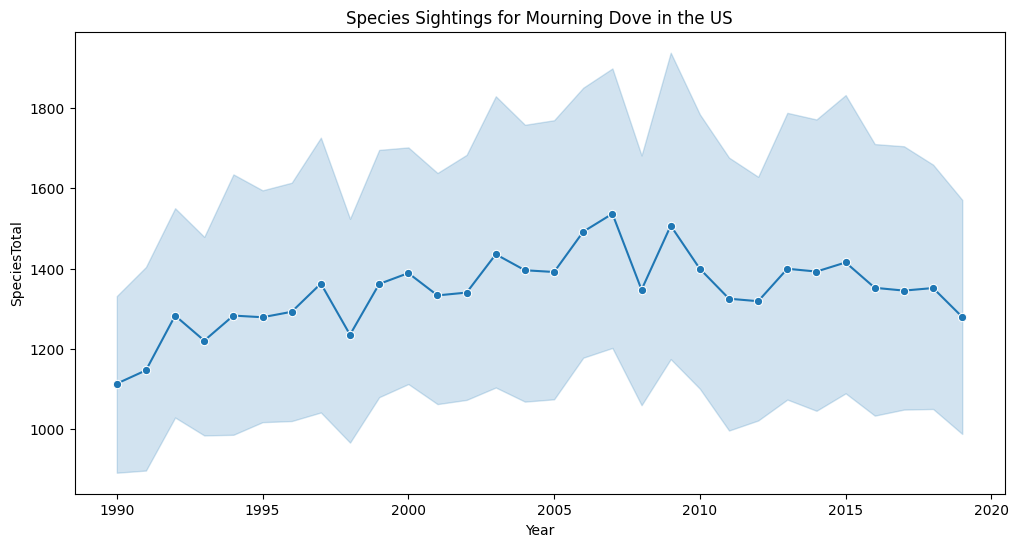

In [3]:
# Visualizing our data 

import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,6))
sns.lineplot(data=df_grouped, x="Year", y="SpeciesTotal", marker="o")

plt.title("Species Sightings for Mourning Dove in the US", fontsize=12)
plt.xlabel("Year", fontsize=10)
plt.ylabel("SpeciesTotal", fontsize=10)

plt.show()

In [4]:
df_grouped["State"].unique()

array([ 2.,  4.,  6.,  7., 11., 14., 17., 18., 21., 25., 27., 33., 34.,
       35., 36., 38., 39., 42., 44., 45., 46., 47., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 63., 64., 65., 66.,
       67., 68., 69., 72., 75., 76., 77., 79., 80., 81., 82., 83., 85.,
       87., 88., 89., 90., 91., 92., 93.])

The metadata defines each state: 

'''
02,Alabama; 03,Alaska; 04,Alberta; 06,Arizona; 07,Arkansas; 11,British Columbia; 14,California; 17,Colorado; 18,Connecticut; 21,Delaware; 25,Florida; 27,Georgia; 33,Idaho; 34,Illinois; 35,Indiana; 36,Iowa; 38,Kansas; 39,Kentucky; 42,Louisiana; 43,Northwest Territories; 44,Maine; 45,Manitoba; 46,Maryland; 47,Massachusetts; 49,Michigan; 50,Minnesota; 51,Mississippi; 52,Missouri; 53,Montana; 54,Nebraska; 55,Nevada; 56,New Brunswick; 57,Newfoundland and Labrador; 58,New Hampshire; 59,New Jersey; 60,New Mexico; 61,New York; 62,Nunavut; 63,North Carolina; 64,North Dakota; 65,Nova Scotia; 66,Ohio; 67,Oklahoma; 68,Ontario; 69,Oregon; 72,Pennsylvania; 75,Prince Edward Island; 76,Quebec; 77,Rhode Island; 79,Saskatchewan; 80,South Carolina; 81,South Dakota; 82,Tennessee; 83,Texas; 85,Utah; 87,Vermont; 88,Virginia; 89,Washington; 90,West Virginia; 91,Wisconsin; 92,Wyoming; 93,Yukon
'''

We will use, for now, 07 Arkansas, 34 Illinois, 52 Missouri.

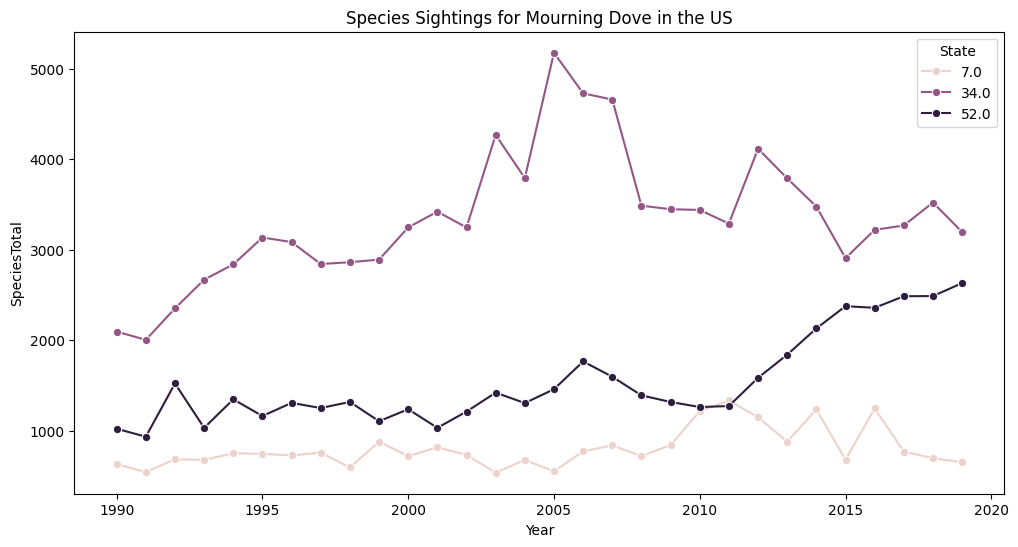

In [5]:
# Visualizing our data 

import seaborn as sns
import matplotlib.pyplot as plt 

df_filtered = df_grouped[df_grouped["State"].isin([7,34,52])]

plt.figure(figsize=(12,6))
sns.lineplot(data=df_filtered, x="Year", y="SpeciesTotal", hue="State", marker="o")

plt.title("Species Sightings for Mourning Dove in the US", fontsize=12)
plt.xlabel("Year", fontsize=10)
plt.ylabel("SpeciesTotal", fontsize=10)
plt.show()

In [6]:
df_filtered

State    Year  SpeciesTotal
90     7.0  1990.0         629.0
91     7.0  1991.0         542.0
92     7.0  1992.0         684.0
93     7.0  1993.0         676.0
94     7.0  1994.0         750.0
..     ...     ...           ...
775   52.0  2015.0        2376.0
776   52.0  2016.0        2358.0
777   52.0  2017.0        2486.0
778   52.0  2018.0        2488.0
779   52.0  2019.0        2631.0

[90 rows x 3 columns]

Now comparing with emission types

In [39]:
import pandas as pd

df_emissions = pd.read_csv("full_data.csv")

states = {
    'Arkansas': 7,
    'Illinois': 34,
    'Missouri': 52
}

df_emissions.rename(columns={'Region': 'State', 'Value': 'Emissions'}, inplace=True)
df_emissions['State'] = df_emissions['State'].map(states)
df_emissions = df_emissions[df_emissions["State"].isin([7, 34, 52])]

df_emissions_pivoted = df_emissions.pivot_table(index=['State', 'Year'], columns='Emission Type', values='Emissions', aggfunc='sum')
df_emissions_pivoted.columns = [col for col in df_emissions_pivoted.columns]
df_emissions_pivoted.reset_index(inplace=True)
df_combined = pd.merge(df_filtered, df_emissions_pivoted, on=['State', 'Year'], how='left')
df_combined = df_combined.drop(columns=['Gross total', 'Net total'])

(df_combined)


State    Year  SpeciesTotal  Carbon dioxide  Fluorinated gases  \
0     7.0  1990.0         629.0       54.132545           1.786645   
1     7.0  1991.0         542.0       52.856844           1.774128   
2     7.0  1992.0         684.0       54.872688           1.784589   
3     7.0  1993.0         676.0       53.910021           1.821897   
4     7.0  1994.0         750.0       57.663686           1.931176   
..    ...     ...           ...             ...                ...   
85   52.0  2015.0        2376.0      131.141261           3.751684   
86   52.0  2016.0        2358.0      124.714462           3.251369   
87   52.0  2017.0        2486.0      130.783979           3.384542   
88   52.0  2018.0        2488.0      131.588221           3.078250   
89   52.0  2019.0        2631.0      123.542202           3.249534   

    Land use and forestry carbon stock change    Methane  Nitrous oxide  
0                                  -54.692963  19.292660       6.820905  
1                                  -53.677058  20.753636       6.932789  
2                                  -53.177882  19.099499       7.071014  
3                                  -52.455692  19.912666       7.185217  
4                                  -51.678457  20.257696       7.031927  
..                                        ...        ...            ...  
85                                 -24.649114  13.959973      16.166956  
86                                 -23.865313  14.543042      14.071274  
87                                 -23.793008  14.902632      15.683796  
88                                 -24.213457  15.575442      16.136778  
89                                 -22.699114  15.095425      14.753059  

[90 rows x 8 columns]

Let's look at one state. We choose Arkansas for now.

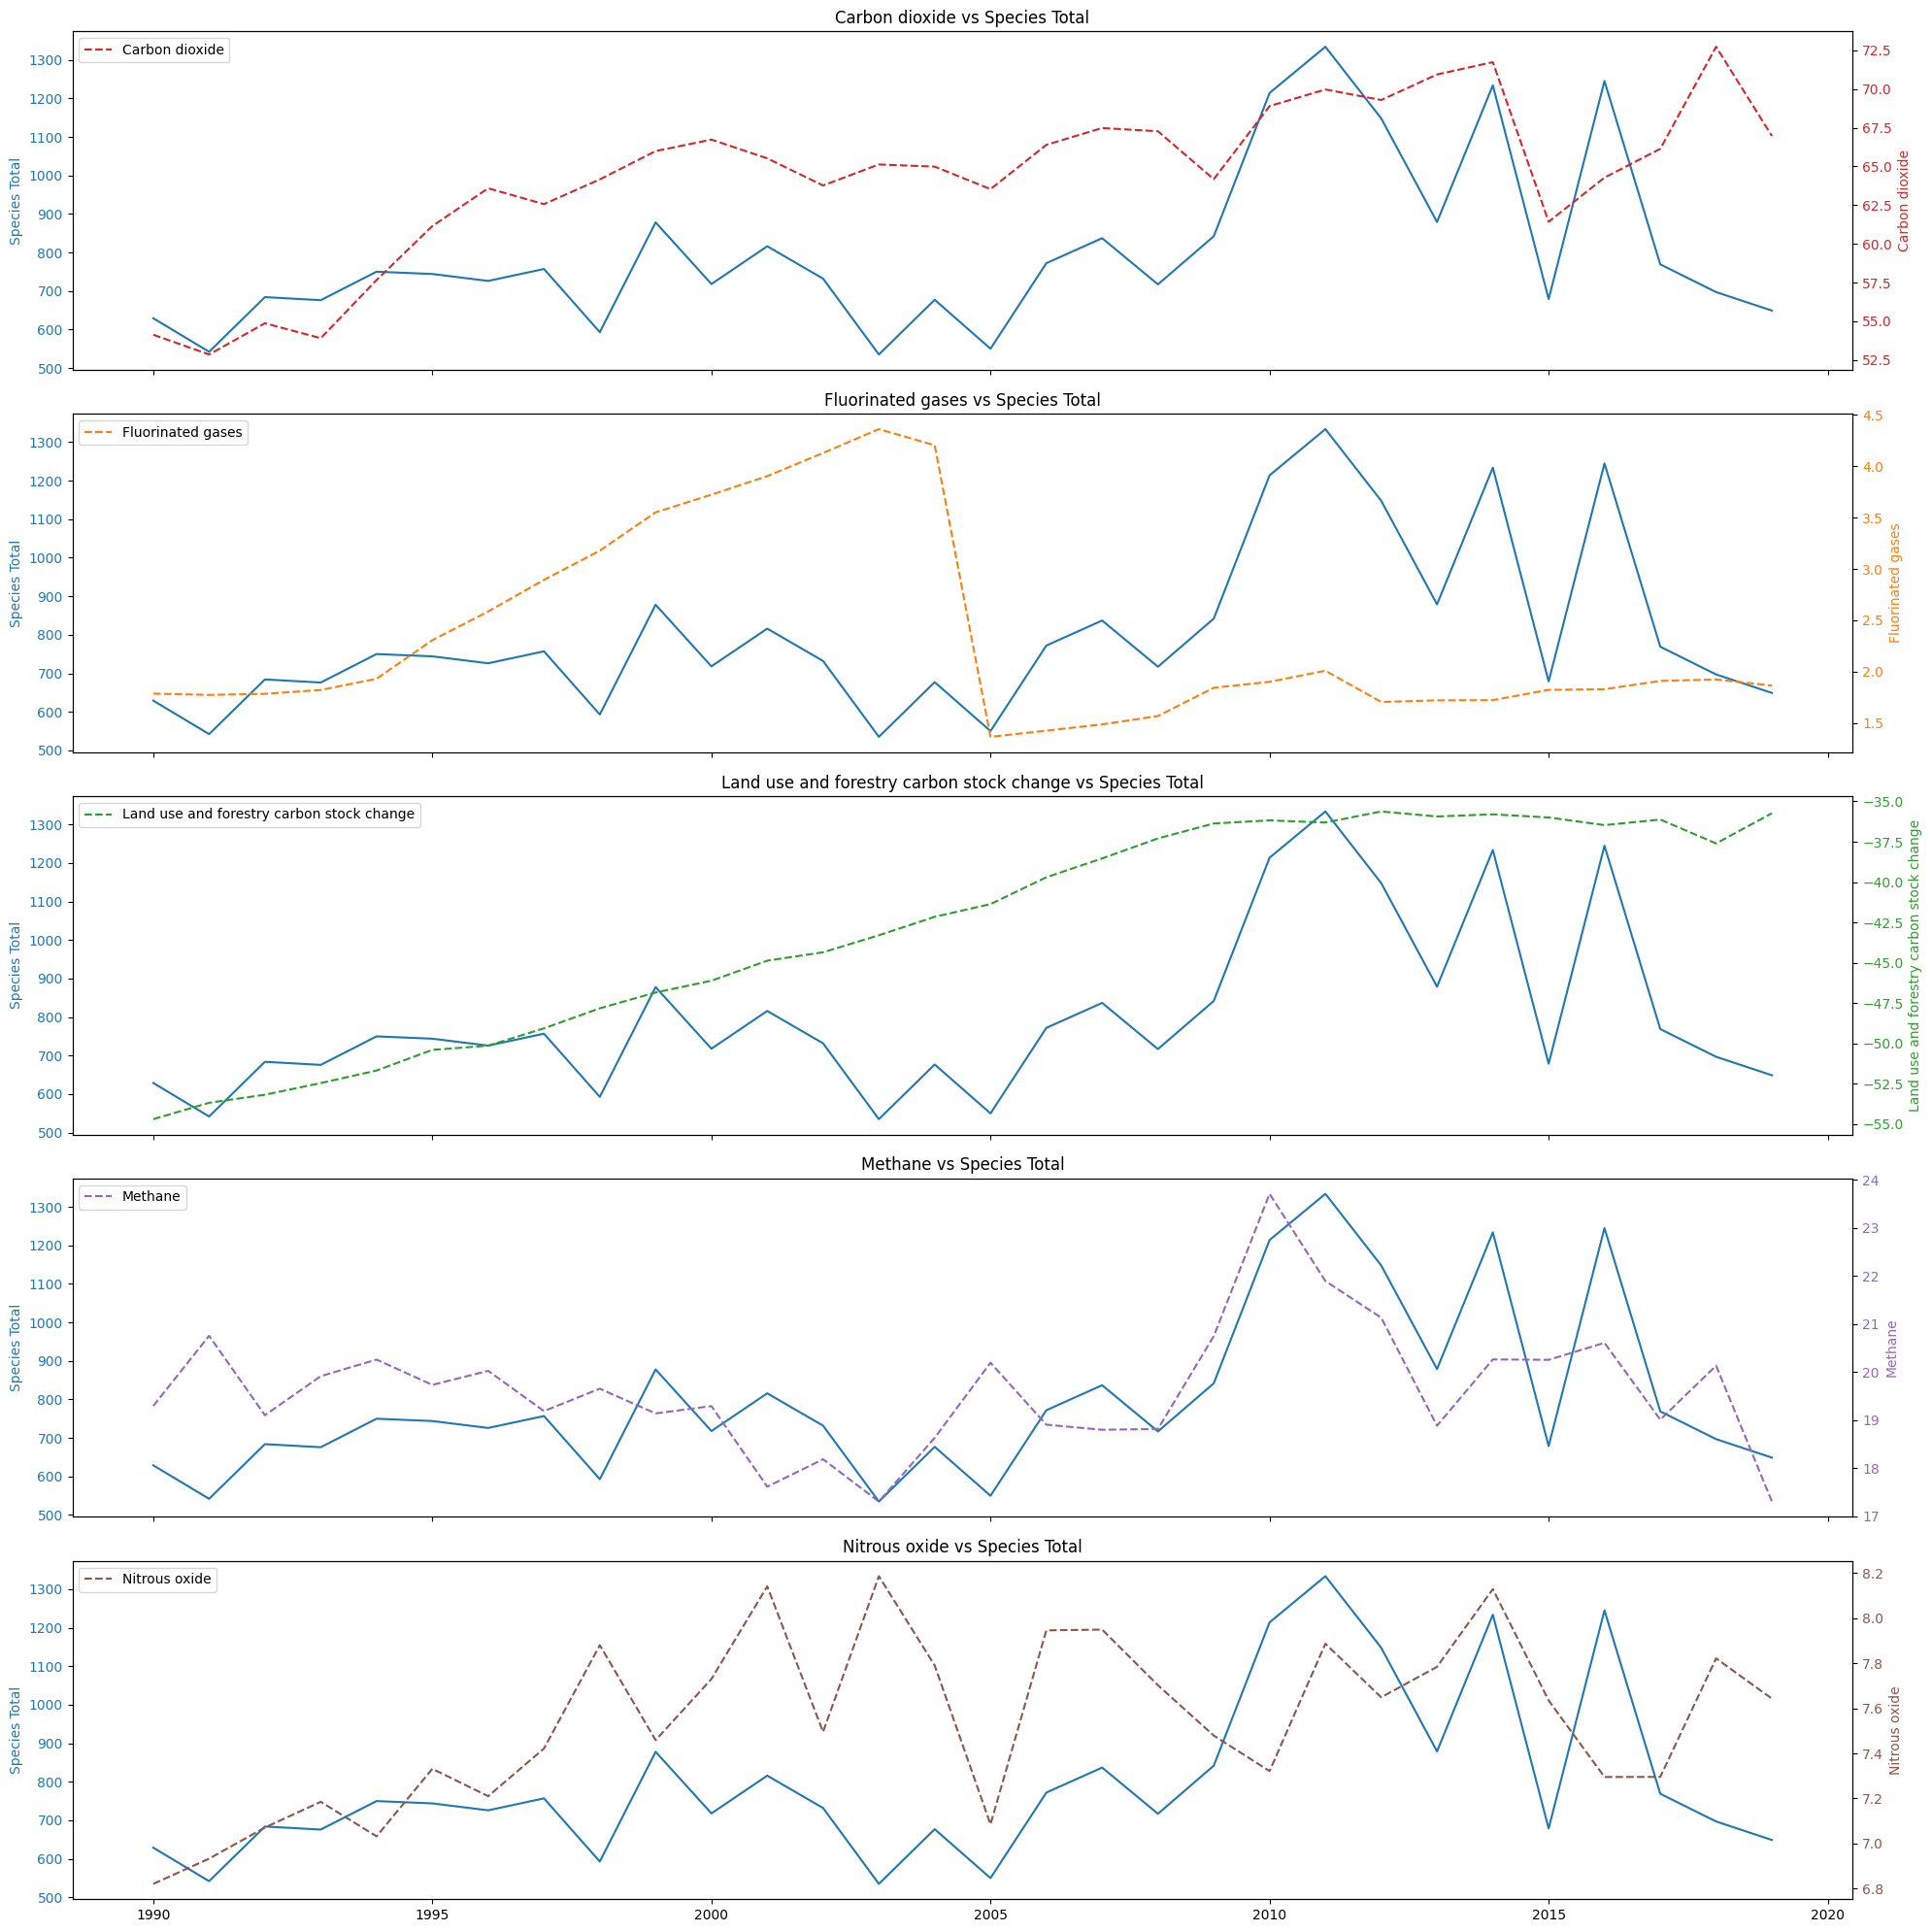

In [50]:
import matplotlib.pyplot as plt

# Arkansas
state_data = df_combined[df_combined['State'] == 7]

fig, axes = plt.subplots(5, 1, figsize=(20, 20), sharex=True)

emission_types = ['Carbon dioxide', 'Fluorinated gases', 'Land use and forestry carbon stock change', 
                  'Methane', 'Nitrous oxide']
colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:purple', 'tab:brown']

for i, emission in enumerate(emission_types):
    ax = axes[i]  
    
    # species
    ax.set_ylabel('Species Total', color='tab:blue')
    ax.plot(state_data['Year'], state_data['SpeciesTotal'], color='tab:blue', label='Species Total')
    
    # emission type
    ax2 = ax.twinx()  
    ax2.set_ylabel(emission, color=colors[i])
    ax2.plot(state_data['Year'], state_data[emission], color=colors[i], label=emission, linestyle='--')
    
    # key
    ax.set_title(f'{emission} vs Species Total')
    ax.tick_params(axis='y', labelcolor='tab:blue') 
    ax2.tick_params(axis='y', labelcolor=colors[i])  
    ax2.legend(loc='upper left')

fig.tight_layout() 
plt.xlabel('Year')
plt.show()


In [43]:
correlation_matrix = df_combined[['SpeciesTotal', 'Carbon dioxide', 'Fluorinated gases', 
                                  'Land use and forestry carbon stock change', 'Methane', 'Nitrous oxide']].corr()
correlation_matrix


SpeciesTotal  Carbon dioxide  \
SpeciesTotal                                   1.000000        0.915412   
Carbon dioxide                                 0.915412        1.000000   
Fluorinated gases                              0.815209        0.858797   
Land use and forestry carbon stock change      0.814000        0.917618   
Methane                                        0.372454        0.430775   
Nitrous oxide                                  0.873839        0.971450   

                                           Fluorinated gases  \
SpeciesTotal                                        0.815209   
Carbon dioxide                                      0.858797   
Fluorinated gases                                   1.000000   
Land use and forestry carbon stock change           0.711549   
Methane                                             0.603259   
Nitrous oxide                                       0.794049   

                                           Land use and forestry carbon stock change  \
SpeciesTotal                                                                0.814000   
Carbon dioxide                                                              0.917618   
Fluorinated gases                                                           0.711549   
Land use and forestry carbon stock change                                   1.000000   
Methane                                                                     0.378159   
Nitrous oxide                                                               0.936623   

                                            Methane  Nitrous oxide  
SpeciesTotal                               0.372454       0.873839  
Carbon dioxide                             0.430775       0.971450  
Fluorinated gases                          0.603259       0.794049  
Land use and forestry carbon stock change  0.378159       0.936623  
Methane                                    1.000000       0.382065  
Nitrous oxide                              0.382065       1.000000

In [44]:
import statsmodels.api as sm

X = df_combined[['Carbon dioxide', 'Fluorinated gases', 'Land use and forestry carbon stock change','Methane', 'Nitrous oxide']]
X = sm.add_constant(X)
y = df_combined['SpeciesTotal']

# regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           SpeciesTotal   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     93.52
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           7.87e-33
Time:                        14:59:10   Log-Likelihood:                -680.09
No. Observations:                  90   AIC:                             1372.
Df Residuals:                      84   BIC:                             1387.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------